### Linear Regression with Synthetic Data
https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf

### Problem: y = w.x + b

label = weight*feature + bias<br>
In this practice, we don't care about the business problem, we just define a general base Linear Regression problem

### Dataset

In [2]:
# Examples
features = [1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0]
labels   = [5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2]

### Model Building & Training Functions

In [3]:
"""Create and compile a simple linear regression model."""
def build_model(learning_rate: float) -> tf.keras.Model:
    # Most simple tf.keras models are sequential. A sequential model contains one or more layers.
    model = tf.keras.models.Sequential()

    # Describe the topography of the model.
    # The topography of a simple linear regression model is a single node in a single layer. 
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

    # Compile the model to code that TensorFlow can efficiently execute. 
    # Configure training to minimize the model's mean squared error. 
    model.compile(
        optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=learning_rate),
        loss="mean_squared_error",
        metrics=[tf.keras.metrics.RootMeanSquaredError()])

    return model

"""
 Input
  @model: tf.keras.Model
  @features: feature set from the example set
  @labels: label set corresponding to feature set from the example set
  @epochs: N/batch_size (N is the number of example) ~ total training iteration
  @batch_size: number of examples for every single training iteration
 Output
 - tuple(weight, bias, epochs, rmse)
"""
def train_model(model: tf.keras.Model, features, labels, epochs, batch_size):
    # Feed the feature values and the label values to the model. The model will train for the number 
    # of epochs, gradually Learning how the feature values RELATE to the label values. 
    history = model.fit(x=features, y=labels, batch_size=batch_size, epochs=epochs)

    weight, bias = model.get_weights()[0], model.get_weights()[1]

    # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch

    # Gather the history (a snapshot) of each epoch.
    hist = pd.DataFrame(history.history)

    # Specifically gather the model's root mean squared error at each epoch. 
    rmse = hist["root_mean_squared_error"] # a pd.Series

    return weight, bias, epochs, rmse

### Plotting functions

In [4]:
"""
 @weight: trained weight
 @bias: trained bias
 @features: feature set from Example
 @labels: label set corresponding to feature set in Example
"""
def plot_model(weight, bias, features, labels):
    plt.figure(figsize=(5, 4))
    # plot feature values vs. label values
    plt.xlabel('feature')
    plt.ylabel('label')
    plt.scatter(features, labels) # the same as: plt.plot(feature, label, 'o')

    # plot the line representing the model, this line starts at coordinates (x0, y0) and ends at (y1, y1)
    x0 = 0
    y0 = bias
    x1 = features[-1]
    y1 = weight*x1 + bias
    plt.plot([x0, x1], [y0, y1], c='r')

    plt.show()

"""
 @epochs: list of epochs (training iteration)
 @rmses: list of rmse corresponding to each epoch
"""
def plot_loss_curve(epochs, rmses):
    plt.figure(figsize=(5,4))
    plt.xlabel('epoch')
    plt.ylabel('root mean squared error')
    
    plt.plot(epochs, rmses, label='loss')
    plt.ylim([rmses.min()*0.97, rmses.max()]) # limit y axis

    plt.legend()
    plt.show()

### Tuning Hyperparameters
- Learning rate: the rate of changing weights on every training iteration<br>
- Batch size: number of examples for each training iteration<br>
- Epochs: number of training iterations

##### Specify initial hyperparameters

Epoch 1/10
1/1 [==============================] - 0s 98ms/step - loss: 1270.3179 - root_mean_squared_error: 35.6415
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 1251.7887 - root_mean_squared_error: 35.3806
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 1238.4781 - root_mean_squared_error: 35.1920
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 1227.4110 - root_mean_squared_error: 35.0344
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 1217.6436 - root_mean_squared_error: 34.8947
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 1208.7386 - root_mean_squared_error: 34.7669
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 1200.4525 - root_mean_squared_error: 34.6475
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 1192.6337 - root_mean_squared_error: 34.5345
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 1185.1809

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 1) + inhomogeneous part.

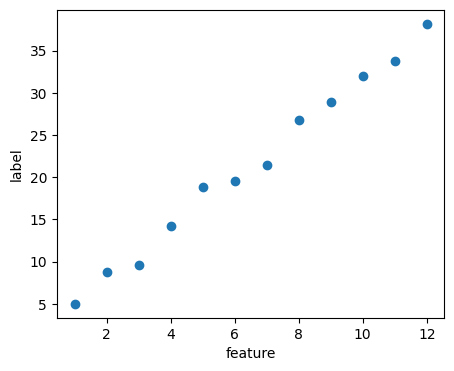

In [7]:
# specify initial hyperparameters
learning_rate = 0.01
batch_size = 12 # full dataset
epochs = 10 # number of training iteration

# training 
my_model = build_model(learning_rate)
weight, bias, epochs, rmses = train_model(my_model, features, labels, epochs, batch_size)

# examine result
plot_model(weight, bias, features, labels)
plot_loss_curve(epochs, rmses)

##### Do Tuning learning_rate & epochs
Increase learning_rate to 0.08 and epochs to 70, the model converses

Epoch 1/70
1/1 [==============================] - 0s 301ms/step - loss: 885.6190 - root_mean_squared_error: 29.7593
Epoch 2/70
1/1 [==============================] - 0s 8ms/step - loss: 765.7578 - root_mean_squared_error: 27.6723
Epoch 3/70
1/1 [==============================] - 0s 9ms/step - loss: 687.0522 - root_mean_squared_error: 26.2117
Epoch 4/70
1/1 [==============================] - 0s 12ms/step - loss: 625.8242 - root_mean_squared_error: 25.0165
Epoch 5/70
1/1 [==============================] - 0s 13ms/step - loss: 574.7929 - root_mean_squared_error: 23.9748
Epoch 6/70
1/1 [==============================] - 0s 11ms/step - loss: 530.6325 - root_mean_squared_error: 23.0355
Epoch 7/70
1/1 [==============================] - 0s 9ms/step - loss: 491.5084 - root_mean_squared_error: 22.1700
Epoch 8/70
1/1 [==============================] - 0s 10ms/step - loss: 456.2875 - root_mean_squared_error: 21.3609
Epoch 9/70
1/1 [==============================] - 0s 9ms/step - loss: 424.2155 - r

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


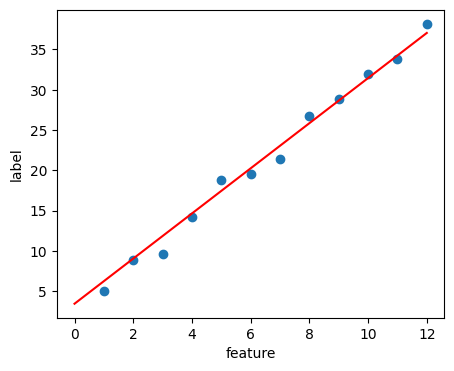

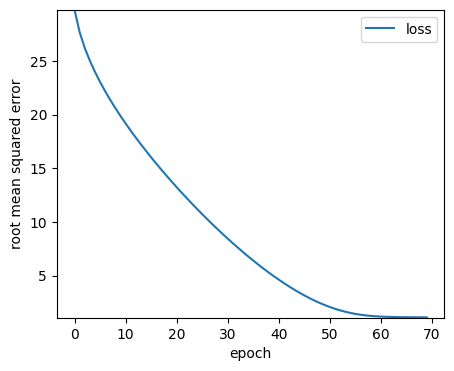

In [60]:
# specify hyperparameters
learning_rate = 0.08
batch_size = 12 # full dataset
epochs = 70

# training 
my_model = build_model(learning_rate)
weight, bias, epochs, rmses = train_model(my_model, features, labels, epochs, batch_size)

# examine result
plot_model(weight, bias, features, labels)
plot_loss_curve(epochs, rmses)

#### Try adjusting batch_size
Set batch_size = 2, WOW, the model converses easily in just 15 epochs. Quite magic, still don't understand why?

Epoch 1/15
6/6 [==============================] - 0s 2ms/step - loss: 952.9929 - root_mean_squared_error: 30.8706
Epoch 2/15
6/6 [==============================] - 0s 3ms/step - loss: 663.9683 - root_mean_squared_error: 25.7676
Epoch 3/15
6/6 [==============================] - 0s 3ms/step - loss: 480.5187 - root_mean_squared_error: 21.9207
Epoch 4/15
6/6 [==============================] - 0s 4ms/step - loss: 343.4772 - root_mean_squared_error: 18.5331
Epoch 5/15
6/6 [==============================] - 0s 5ms/step - loss: 243.7792 - root_mean_squared_error: 15.6134
Epoch 6/15
6/6 [==============================] - 0s 5ms/step - loss: 168.5504 - root_mean_squared_error: 12.9827
Epoch 7/15
6/6 [==============================] - 0s 4ms/step - loss: 110.4717 - root_mean_squared_error: 10.5105
Epoch 8/15
6/6 [==============================] - 0s 4ms/step - loss: 68.2586 - root_mean_squared_error: 8.2619
Epoch 9/15
6/6 [==============================] - 0s 4ms/step - loss: 38.0085 - root_mean_

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


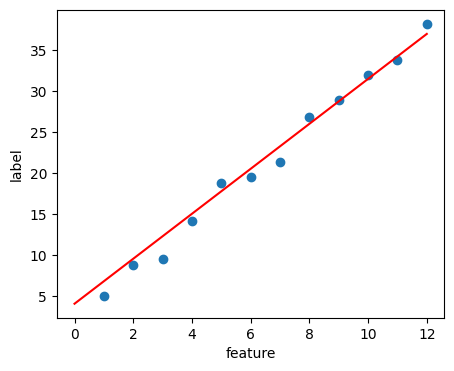

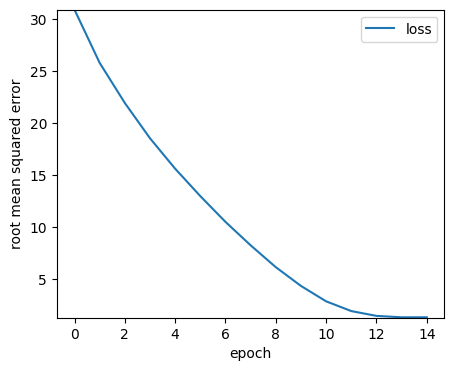

In [62]:
# specify hyperparameters
learning_rate = 0.08
batch_size = 2
epochs = 15

# training 
my_model = build_model(learning_rate)
weight, bias, epochs, rmses = train_model(my_model, features, labels, epochs, batch_size)

# examine result
plot_model(weight, bias, features, labels)
plot_loss_curve(epochs, rmses)